In [1]:

from collections import OrderedDict

from matplotlib import pyplot as plt
import f3dasm
from rvesimulator.additionals.ampitudesampler import AmplitudeGenerator
from rvesimulator.cases.cddm_sve import CDDMSVE 

In [2]:
# create the doe
num_amplitude = 3
path_sampler = AmplitudeGenerator(num_dim=3)
paths = path_sampler.get_amplitude(
    num_amplitude=num_amplitude,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)
samples_dict = paths.to_dict("records")

In [3]:
#
simulator = CDDMSVE()
simulator.update_sim_info(
    size=1.0,
    radius=0.15,
    task="task1",
    hardening_law="swift",
    yield_stress=0.5,
    a=0.2,
    b=0.4,
    print_info=True,
    num_steps=100,
    simulation_time=1.0,
    strain=[0.02, 0.02, 0.02],
    num_cpu=6,
)


Simulation information: 

{
    "length": 1.0,
    "width": 1.0,
    "radius": 0.15,
    "task": "task1",
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 6,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "youngs": 100.0,
    "poisson_ratio": 0.3
}


In [4]:
# calculate the initial responses of simulation
results = {}
for ii in range(len(samples_dict)):
    results[ii] = simulator.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )



/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :205.001638 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


abaqus license is not enough,waiting for license authorization
abaqus license is not enough,waiting for license authorization
abaqus license is not enough,waiting for license authorization

*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :225.002231 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_2
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :190.002872 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


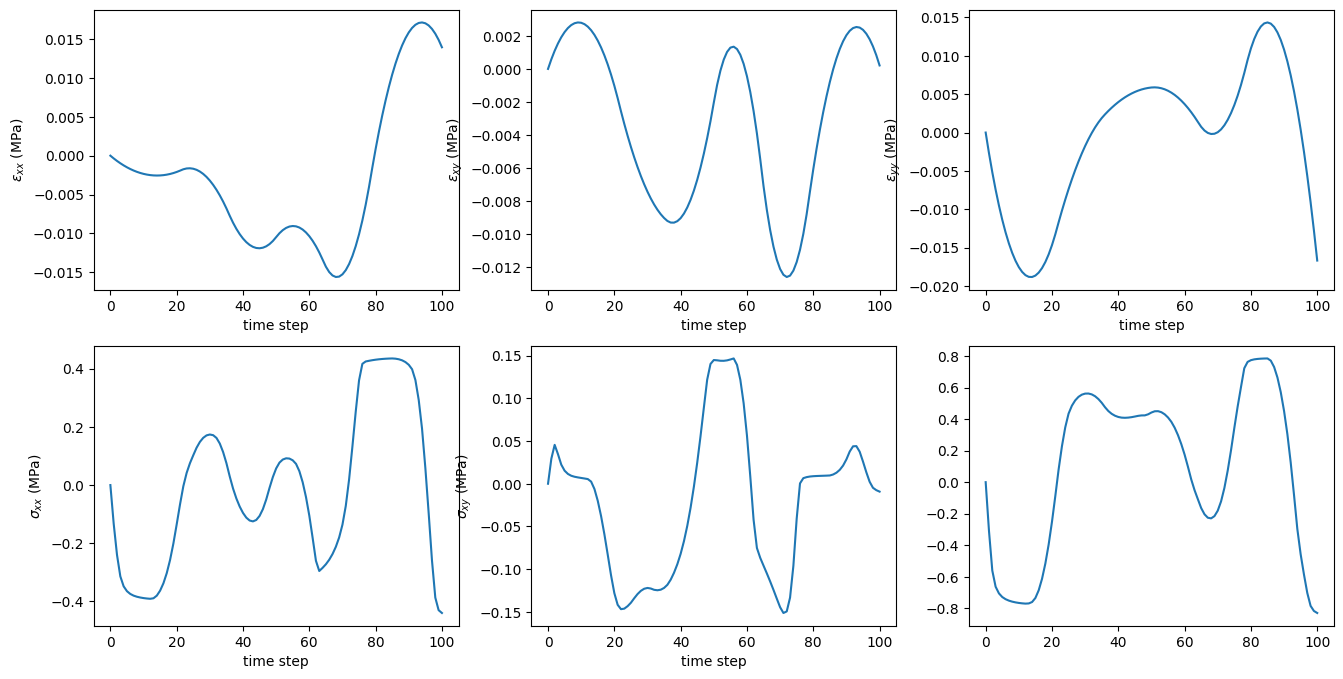

In [6]:
index = 1 
fig, ax = plt.subplots(2,3, figsize =(16, 8))
pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
ax[0,0].plot(
    results[index]["strain"][:, 0, 0],
)
ax[0,0].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
ax[0,1].plot(
    results[index]["strain"][:, 0, 1],
)
ax[0,1].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
ax[0,2].plot(
    results[index]["strain"][:, 1, 1],
)
ax[0,2].set(**pparam)

pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
ax[1,0].plot(
    results[index]["stress"][:, 0, 0],
)
ax[1,0].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
ax[1,1].plot(
    results[index]["stress"][:, 0, 1],
)
ax[1,1].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
ax[1,2].plot(
    results[index]["stress"][:, 1, 1],

)
plt.show()